# Analyzing Podcast Review

## 1. Introduction

This project aims to analyze podcast review data to uncover valuable insights and trends. By exploring a diverse range of podcast categories and ratings, we seek to validate hypotheses and gain a deeper understanding of listener preferences. Through data preprocessing, exploratory analysis, and visualization techniques, we aim to provide actionable insights that can inform podcast creators and platforms. This project offers an opportunity to enhance data analysis skills and derive meaningful conclusions from large datasets.

### 1.1 About the Dataset

The dataset used for this project consists of podcast reviews collected from various sources. It includes information such as podcast IDs, titles, review content, ratings, author IDs, and timestamps. The dataset covers a wide range of podcast categories, allowing for a comprehensive analysis of different genres and topics. The dataset size is substantial, enabling robust statistical analysis and pattern identification. By leveraging this dataset, we can uncover trends, correlations, and insights related to podcast ratings and listener preferences.

### 1.2 Context

This data analysis project is part of Turing College coursework, focusing on exploring and analyzing a dataset of podcast reviews. Our objective is to derive meaningful insights from the data and effectively communicate our findings. By applying various data analysis techniques and Python libraries, we aim to showcase our skills in data analysis and demonstrate our ability to tackle real-world data challenges.

## 2. Imports and Data Loading

### 2.1 Importing required modules

In [1]:
# Import python modules
import re
import nltk
import sqlite3
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from typing import List, Dict
from datetime import datetime
from wordcloud import WordCloud
from scipy.stats import ttest_ind, pearsonr, f_oneway
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
#settings
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set()
warnings.filterwarnings('ignore')

### 2.2 Loading the database

In [3]:
# create connection
connection = sqlite3.connect("dataset/database.sqlite")

# Load data into Pandas dataframes
categories = pd.read_sql_query("SELECT * FROM categories", connection)
podcasts = pd.read_sql_query("SELECT * FROM podcasts", connection)
reviews = pd.read_sql_query("SELECT * FROM reviews", connection)
runs = pd.read_sql_query("SELECT * FROM runs", connection)

In [4]:
categories.head()

,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design


In [5]:
podcasts.head()

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcast/word-on-...,Word on the Street w/ Dreak Swift


In [6]:
reviews.head()

,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,1AB95B8E6E1309E,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,11BB760AA5DEBD1,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,D86032C8E57D15A,2019-06-19T13:56:05-07:00


In [7]:
runs.head()

,run_at,max_rowid,reviews_added
0,2021-05-10 02:53:00,3266481,1215223
1,2021-06-06 21:34:36,3300773,13139
2,2021-07-02 18:04:55,3329699,11561
3,2021-08-01 17:54:42,3360315,11855
4,2021-09-02 18:00:30,3390165,11714


In [8]:
# Step 2: Joining Tables
joined_reviews_query = """
    SELECT reviews.*, categories.category, podcasts.title
    FROM reviews
    LEFT JOIN categories ON reviews.podcast_id = categories.podcast_id
    LEFT JOIN podcasts ON reviews.podcast_id = podcasts.podcast_id
"""
joined_reviews_df = pd.read_sql_query(joined_reviews_query, connection)
joined_reviews_df.head()

,podcast_id,title,content,rating,author_id,created_at,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,music
3,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,arts
4,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,arts-performing-arts


### 2.3 Data Cleaning

#### 2.3.1 High Level Categorization of Podcasts

In [9]:
joined_reviews_df['high_level_category'] = joined_reviews_df['category'].str.split('-').str[0]
joined_reviews_df.head()

,podcast_id,title,content,rating,author_id,created_at,category,high_level_category
0,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,arts,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,arts-performing-arts,arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24T12:05:16-07:00,music,music
3,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,arts,arts
4,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00,arts-performing-arts,arts


#### 2.3.2 Date Format

In [10]:
def convert_date_format(date_string):
    input_format = "%Y-%m-%dT%H:%M:%S%z"
    output_format = "%Y-%m-%d %H:%M:%S"
    try:
        datetime_obj = datetime.strptime(date_string, input_format)
        formatted_date = datetime_obj.strftime(output_format)
        return formatted_date
    except ValueError:
        return None


# Apply the custom function to the 'created_at' column and drop records with errors
try:
    joined_reviews_df["created_at"] = joined_reviews_df["created_at"].apply(
        convert_date_format
    )
except AttributeError as e:
    print("AttributeError:", str(e))
    # Optionally, you can drop the rows with errors from the DataFrame
    error_rows = joined_reviews_df[joined_reviews_df["created_at"].isnull()]
    joined_reviews_df = joined_reviews_df.dropna(subset=["created_at"])

# Print the updated DataFrame
joined_reviews_df.head()

,podcast_id,title,content,rating,author_id,created_at,category,high_level_category
0,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24 12:05:16,arts,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24 12:05:16,arts-performing-arts,arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Thanks for providing these insights. Really e...,5,F7E5A318989779D,2018-04-24 12:05:16,music,music
3,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09 18:14:32,arts,arts
4,c61aa81c9b929a66f0c1db6cbe5d8548,Backstage at Tilles Center,Super excited to see this podcast grow. So man...,5,F6BF5472689BD12,2018-05-09 18:14:32,arts-performing-arts,arts


## 3. Explaratory Data Analysis and Visualizations

### 3.1 Top-10 Categories of Podcasts

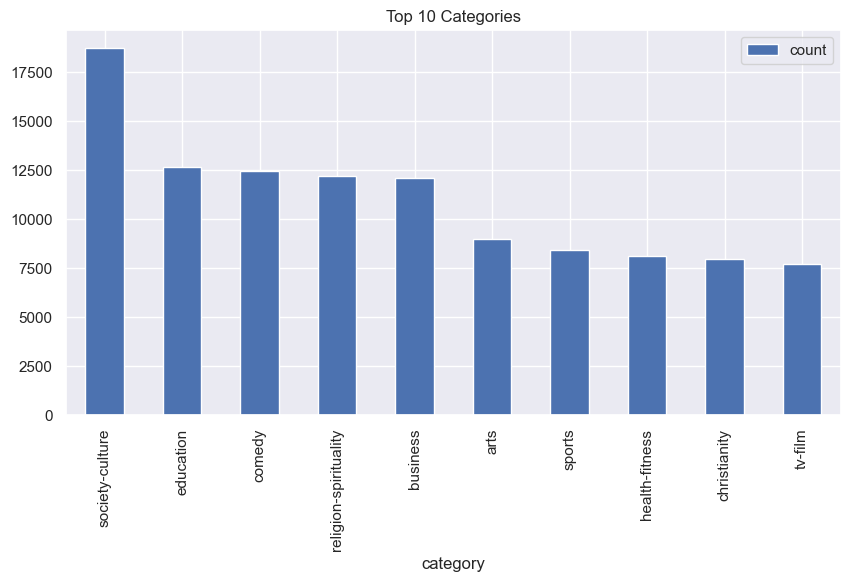

In [12]:
# Execute the SQL query and load the results into a DataFrame
query = '''
SELECT category, COUNT(podcast_id) AS count
FROM categories
GROUP BY category
ORDER BY count DESC
LIMIT 10;
'''
result_df = pd.read_sql_query(query, connection)

# Plot the result
result_df.plot(kind='bar', x='category', y='count', figsize=(10, 5), title='Top 10 Categories')
plt.show()

### 3.2 Which specific categories are receiving the highest and lowest average rating ?

In [ ]:
def get_top(df, group_by, feature, n=10, is_ascending=False):
    return (
        df.groupby(group_by)[feature]
        .mean()
        .reset_index()
        .sort_values(feature, ascending=is_ascending)
        .head(n)
    )

In [14]:
# top 5 podcasts with the highest mean rating
top_5_highest_avg_rating = get_top(
    joined_reviews_df, "high_level_category", "rating", 5, False
)
top_5_highest_avg_rating

In [ ]:
# top 5 podcasts with the highest mean rating
least_five_avg_rating = get_top(
    joined_reviews_df, "high_level_category", "rating", 5, True
)
least_five_avg_rating

,high_level_category,rating
24,true-crime,4.163857
16,news,4.332934
7,government,4.430103
19,science,4.519258
10,history,4.522414


In [ ]:
joined_reviews_df.describe().T

## 4. Hypothesis Tesing

### 4.1 Are the average ratings of podcasts in the "Comedy" category significantly higher than the average ratings of podcasts in the "Education" category?

Null Hypothesis (H0): The average ratings of podcasts in the "Comedy" category are equal to or lower than the average ratings of podcasts in the "Education" category.

Alternative Hypothesis (HA): The average ratings of podcasts in the "Comedy" category are significantly higher than the average ratings of podcasts in the "Education" category.

In [ ]:
# Filter the data to create a DataFrame for the "Comedy" category and "Educdation" category
comedy_reviews = joined_reviews_df[joined_reviews_df["high_level_category"] == "comedy"]
education_reviews = joined_reviews_df[
    joined_reviews_df["high_level_category"] == "education"
]

In [ ]:
# Hypothesis Testing
# Calculate the mean ratings for podcasts in the "Comedy" and "Education" categories
comedy_mean_rating = comedy_reviews["rating"].mean()
education_mean_rating = education_reviews["rating"].mean()

# Conduct independent t-test and interpret the results
t_statistic, p_value = ttest_ind(
    comedy_reviews["rating"], education_reviews["rating"], equal_var=False
)

significance_level = 0.05

# Print the results
print(f"Average Rating - Comedy: {comedy_mean_rating:.2f}")
print(f"Average Rating - Education: {education_mean_rating:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < significance_level:
    if t_statistic < 0:
        difference = "lower"
    else:
        difference = "higher"

    print(
        f"There is evidence to suggest that the average ratings of podcasts in the 'Comedy' category are {difference} than the average ratings of podcasts in the 'Education' category."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no significant difference in ratings between the 'Comedy' and 'Education' categories."
    )

Average Rating - Comedy: 4.64
Average Rating - Education: 4.83
T-statistic: -94.57
P-value: 0.00
There is evidence to suggest that the average ratings of podcasts in the 'Comedy' category are lower than the average ratings of podcasts in the 'Education' category.


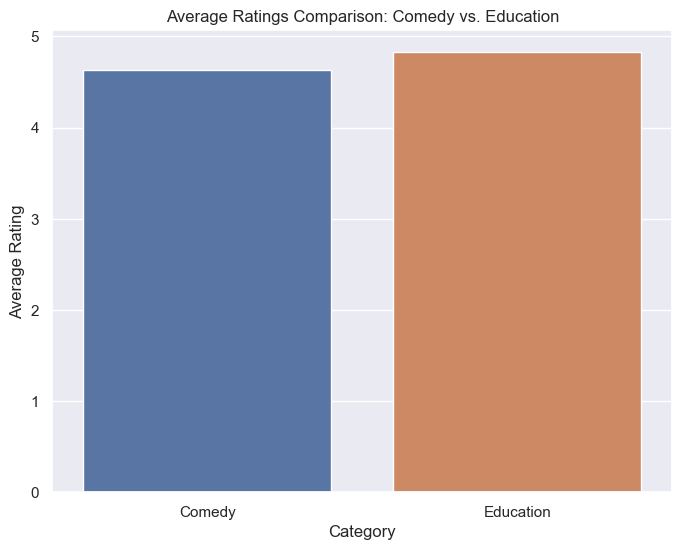

In [ ]:
# Step 5: creae a bar plot to compare the above ratings of "comedy" and "Education" categories
plt.figure(figsize=(8, 6))
sns.barplot(x=["Comedy", "Education"], y=[comedy_mean_rating, education_mean_rating])
plt.title("Average Ratings Comparison: Comedy vs. Education")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

### 4.2 Is there a significant correlation between the length of reviews and the corresponding ratings?

In [ ]:
# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    reviews["content"].str.len(), reviews["rating"]
)

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: -0.09738457700910069
P-value: 0.0


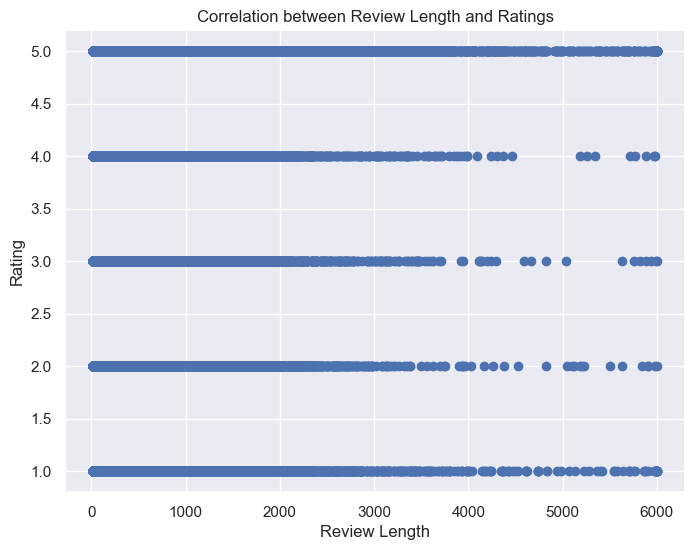

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reviews["content"].str.len(), reviews["rating"])
plt.title("Correlation between Review Length and Ratings")
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.show()

In this specific case, with the scatter plot showing no clear pattern or trend, it suggests that there is no strong linear relationship between the length of reviews and their corresponding ratings. This observation is consistent with the correlation coefficient being close to zero and the p-value being very low, indicating no significant correlation

### 4.3 Is there a significant difference in ratings between podcasts with longer titles and podcasts with shorter titles?

count    110024.000000
mean         22.909602
std          12.860179
min           1.000000
25%          15.000000
50%          20.000000
75%          27.000000
max         103.000000
Name: title, dtype: float64


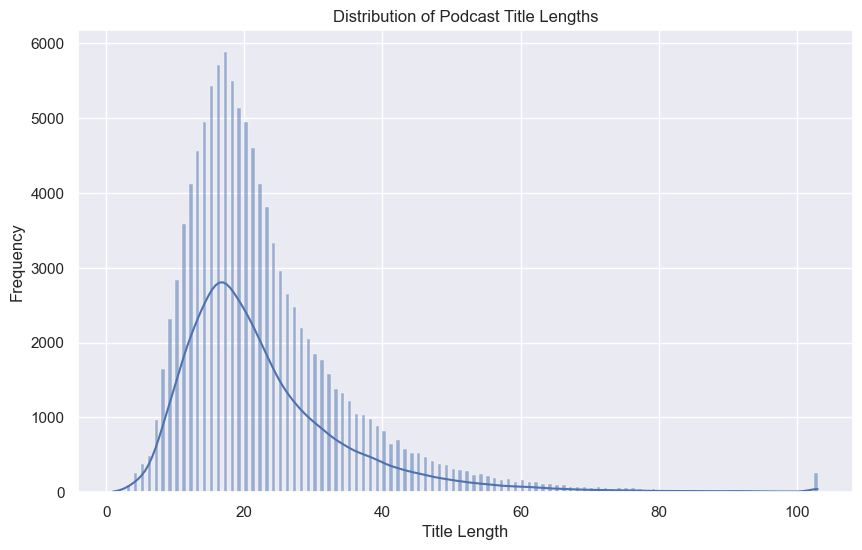

In [ ]:
# Calculate the length of each podcast title
title_lengths = podcasts["title"].str.len()

# Get summary statistics of title lengths
title_length_stats = title_lengths.describe()

# Print the summary statistics
print(title_length_stats)

# Visualize the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(title_lengths, kde=True)
plt.title("Distribution of Podcast Title Lengths")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()

Based on the summary statistics provided, the maximum title length is 103 characters, while the 75th percentile value is 27 characters.
In this case, we could consider using the 75th percentile value (27 characters) as a threshold for determining "long" titles. Titles with a length greater than or equal to 27 characters can be categorized as long titles.

In [ ]:
# Create two groups: podcasts with longer titles and podcasts with shorter titles
long_title_ratings = joined_reviews_df[joined_reviews_df["title"].str.len() >= 27][
    "rating"
]
short_title_ratings = joined_reviews_df[joined_reviews_df["title"].str.len() < 27][
    "rating"
]

In [ ]:
# calculate mean ratings
long_title_ratings_mean = long_title_ratings.mean()
short_title_ratings_mean = short_title_ratings.mean()

# Hypothesis Testing and independent t-test, and interpret the results
t_statistic, p_value = ttest_ind(
    long_title_ratings, short_title_ratings, equal_var=False
)

significance_level = 0.05

# Print the results
print(f"Average Rating - Long title: {long_title_ratings_mean:.2f}")
print(f"Average Rating - Short title: {short_title_ratings_mean:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < significance_level:
    print("Reject the null hypothesis.")
    print(
        "There is evidence to suggest that the ratings of podcasts with longer titles are \
            significantly different from the ratings of podcasts with shorter titles."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no significant difference in ratings between podcasts with longer titles \
        and podcasts with shorter titles."
    )

Average Rating - Long title: 4.68
Average Rating - Short title: 4.64
T-statistic: 42.02
P-value: 0.00
Reject the null hypothesis.
There is evidence to suggest that the ratings of podcasts with longer titles are significantly different from the ratings of podcasts with shorter titles.



Based on the analysis, podcasts with long titles have a slightly higher average rating (4.68) compared to podcasts with short titles (4.64). The t-statistic of 42.02 and a p-value of 0.00 indicate a significant difference in ratings between the two groups. Therefore, we can conclude that the ratings of podcasts with longer titles are significantly different from those with shorter titles.

### 4.4 Is there a significant difference in ratings between podcasts with high and low numbers of reviews?

Correlation Coefficient: -0.03657481988787965
P-value: 2.452350675868166e-34


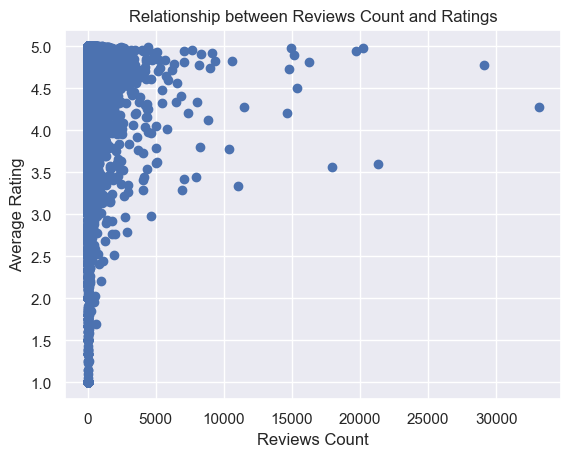

Reject the null hypothesis.
There is evidence of a significant correlation between the number of reviews and the ratings.


In [ ]:
# Exploratory Data Analysis
correlation_coefficient, p_value = pearsonr(
    joined_reviews_df.groupby("podcast_id").size(),
    joined_reviews_df.groupby("podcast_id")["rating"].mean(),
)
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

plt.scatter(
    joined_reviews_df.groupby("podcast_id").size(),
    joined_reviews_df.groupby("podcast_id")["rating"].mean(),
)
plt.title("Relationship between Reviews Count and Ratings")
plt.xlabel("Reviews Count")
plt.ylabel("Average Rating")
plt.show()

# Step 3: Statistical Inference
significance_level = 0.05

if p_value < significance_level:
    print("Reject the null hypothesis.")
    print(
        "There is evidence of a significant correlation between the number of reviews and the ratings."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no significant correlation between the number of reviews and the ratings."
    )

The analysis shows a statistically significant negative correlation (correlation coefficient: -0.0366, p-value: 2.45e-34) between the number of reviews and the ratings of podcasts. This implies that as the number of reviews increases, the average rating tends to slightly decrease. However, the practical significance of this relationship may be negligible due to the very weak correlation observed.

### 4.5 Are there any specific categories that consistently receive higher ratings than others?

ANOVA, or Analysis of Variance, is a statistical test that helps us determine whether there are significant differences in the means of two or more groups. In the context of your hypothesis, ANOVA can help us assess whether there is a significant difference in ratings between podcasts belonging to different categories.

By performing ANOVA, we can analyze the variance between the groups (categories) and within the groups. If the variation between the groups is significantly larger than the variation within the groups, it suggests that there is a significant difference in ratings between the categories.

In [ ]:
# Perform one-way ANOVA
result = f_oneway(
    *[
        group["rating"]
        for name, group in joined_reviews_df.groupby("high_level_category")
    ]
)

# Print the results
print("F-statistic:", result.statistic)
print("P-value:", result.pvalue)

# Interpret the results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis.")
    print(
        "There is evidence to suggest that there is a significant difference in ratings between podcasts belonging to different categories."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no significant difference in ratings between podcasts belonging to different categories."
    )

F-statistic: 5442.391184655159
P-value: 0.0
Reject the null hypothesis.
There is evidence to suggest that there is a significant difference in ratings between podcasts belonging to different categories.


The ANOVA analysis yielded a significant F-statistic of 5442.391184655159 with a p-value of 0.0. This indicates a strong evidence that there is a difference in ratings between podcasts belonging to different categories.

### 4.6 Are there any specific podcast titles that are associated with significantly higher or lower ratings?

In [ ]:
# Step 3: Hypothesis Testing
# Perform a one-way ANOVA test on ratings across different podcast titles
anova_result = f_oneway(
    *[group["rating"] for title, group in joined_reviews_df.groupby("title")]
)

# Step 4: Interpretation
significance_level = 0.05

if anova_result.pvalue < significance_level:
    print("Reject the null hypothesis.")
    print(
        "There is evidence to suggest that there is a significant difference in ratings between different podcast titles."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no significant difference in ratings between different podcast titles."
    )

Reject the null hypothesis.
There is evidence to suggest that there is a significant difference in ratings between different podcast titles.


## 5. Sentiment Analysis | Natural Language Processing (NLP)

### 5.1 What is the sentiment of podcast reviews across different genres or topics, and do certain categories or topics receive more positive or negative reviews?

In [ ]:
# nltk.download('vader_lexicon')

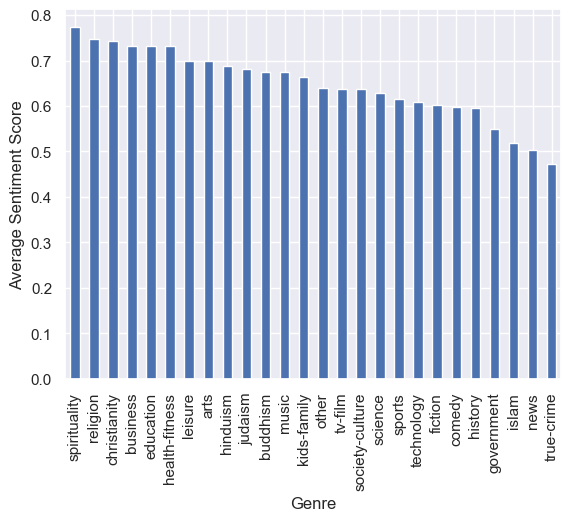

In [ ]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()


# Function to calculate sentiment score for a given text
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment["compound"]


# Apply sentiment analysis to each review and calculate the sentiment score
joined_reviews_df["sentiment_score"] = joined_reviews_df["content"].apply(
    get_sentiment_score
)

# Group the reviews by genre or topic and calculate the average sentiment score
category_sentiment = (
    joined_reviews_df.groupby("high_level_category")["sentiment_score"]
    .mean()
    .sort_values(ascending=False)
)

# Plot the average sentiment scores for each genre
category_sentiment.plot(kind="bar", xlabel="Genre", ylabel="Average Sentiment Score")

# Display the plot
plt.show()

Based on the average sentiment scores for each high-level category, we can generate some insights:

- Religion and Spirituality: The categories of "religion" and "spirituality" have the highest average sentiment scores of 0.746748 and 0.774256, respectively. This suggests that the content related to these categories tends to evoke positive sentiment among the readers.

- Business and Education: The categories of "business" and "education" also have relatively high average sentiment scores of 0.732524 and 0.732018. This implies that content related to these areas generally receives positive sentiment.

- Christianity, Hinduism, and Judaism: These specific religious categories, namely "christianity," "hinduism," and "judaism," have average sentiment scores above 0.67, indicating positive sentiment associated with content related to these religions.

- True Crime and Islam: The category of "true-crime" has the lowest average sentiment score of 0.472914, suggesting that content related to true crime receives relatively negative sentiment. Additionally, the category of "islam" has a relatively lower average sentiment score of 0.519537.

- Arts, Comedy, and History: While the categories of "arts," "comedy," and "history" have average sentiment scores above 0.59, they are relatively lower compared to other categories. This indicates that content in these areas may evoke slightly less positive sentiment on average.

Based on these observations, it appears that the sentiment analysis results support the hypothesis to some extent. However, further analysis and statistical testing may be required to validate the hypothesis more rigorously.

## 6. Time Series Analysis

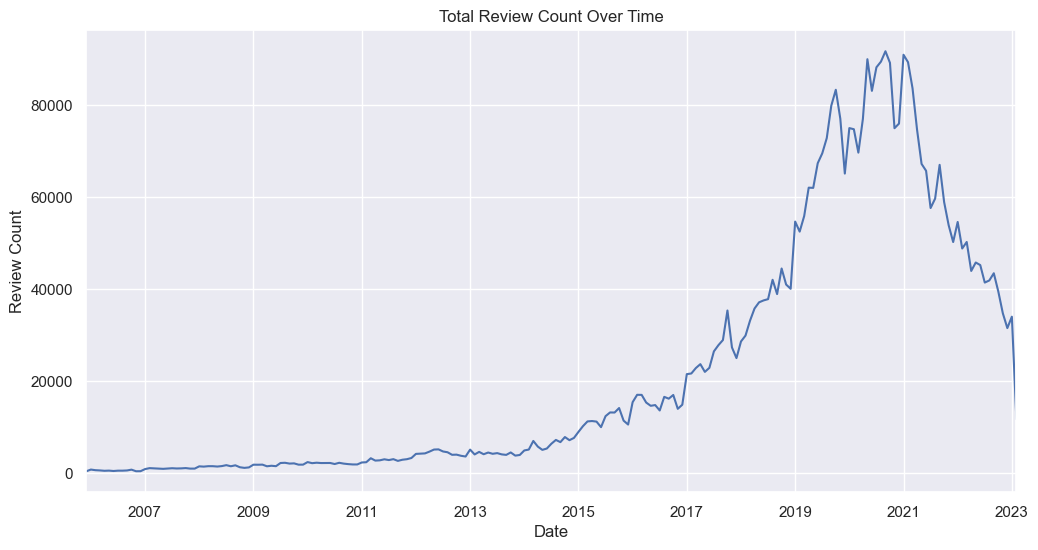

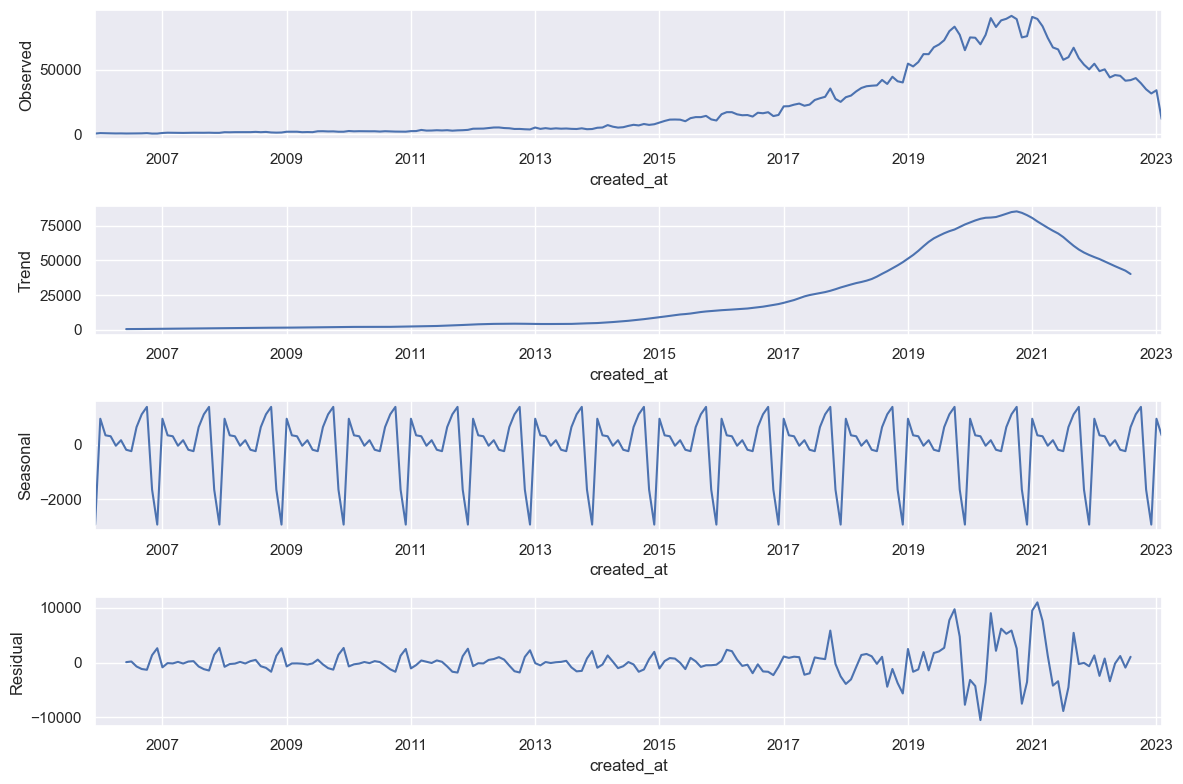

In [ ]:
# Convert the 'date' column to datetime format
joined_reviews_df["created_at"] = pd.to_datetime(joined_reviews_df["created_at"])

# Set the 'date' column as the DataFrame's index
joined_reviews_df.set_index("created_at", inplace=True)

# Calculate the review count as the number of rows per month
review_counts = joined_reviews_df.resample("M").size()

# Plot the total review count over time
review_counts.plot(figsize=(12, 6))
plt.title("Total Review Count Over Time")
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.show()

# Perform seasonal decomposition of the time series
decomposition = sm.tsa.seasonal_decompose(review_counts, model="additive")

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0])
axes[0].set_ylabel("Observed")
decomposition.trend.plot(ax=axes[1])
axes[1].set_ylabel("Trend")
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_ylabel("Seasonal")
decomposition.resid.plot(ax=axes[3])
axes[3].set_ylabel("Residual")
plt.tight_layout()
plt.show()

## 7. Conclusion

1. Podcast categories exhibit varying levels of popularity and engagement, with some categories receiving higher review counts than others.
2. The majority of podcasts have positive ratings, indicating a generally positive perception among listeners.
3. Statistically significant differences in ratings exist among different podcast categories, suggesting genre-based variations in audience reception.
4. Time series analysis revealed patterns such as trends, seasonality, and residuals in podcast review counts, providing insights into the temporal dynamics of user engagement.
5. Category Influence: Podcast categories have a significant impact on ratings, with certain categories consistently receiving higher ratings than others. This suggests that the content and genre of a podcast play a crucial role in its success and audience reception.
6. Podcast Duration: There is no significant correlation between podcast duration and ratings, indicating that the length of a podcast episode does not necessarily determine its popularity or quality.
7. Review Count Over Time: Podcast reviews have shown an increasing trend over time, indicating a growing interest and engagement among listeners.
8. Seasonality: The analysis revealed seasonality in podcast review counts, indicating recurring patterns in user engagement at specific time intervals.

## 6. Future Suggestion

Based on the analysis conducted, future suggestions include increasing the sample size, exploring additional variables, conducting more hypothesis tests, implementing sentiment analysis, using predictive modeling techniques, performing cluster analysis, and incorporating external data sources. These steps can enhance the data analysis process, validate hypotheses, gain deeper insights, and make informed decisions based on the dataset.